
    survival          생존 여부            0 = No, 1 = Yes

    pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

    sex               성별    

    Age               나이  

    sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    

    parch             부모나 자식과 같이 탄 경우 수   

    ticket            표 번호    

    fare              요금

    cabin             선실 번호   

    embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton
    


******역사적 배경 1912년 미국 가는 배 ?


point . 나이 범주화 또는  mr , mrs , name 를 이용한 age 결측치 채우기 

2. (1,2,3 등 칸 )
3. 아이 우선 기준 13세 이하 ? -> 나이를 이용한 생존율 예측 -> linear regressioin
 - > age group heatmap


### pclass,Age,sex, 

q1. 가장 많이 영향을 주는 요인?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
test_csv = pd.read_csv('/Users/chosunghyun/Desktop/Python.proj/kaggle/Titanic/test.csv')
train_csv = pd.read_csv('/Users/chosunghyun/Desktop/Python.proj/kaggle/Titanic/train.csv')

In [13]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [14]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


data 수는 다다익션 -> 합칠까?      891 - > 891+418

라벨 처리?  -> paseenger id,, anyway ok


In [5]:
train_data = train_csv.copy()
test_data = test_csv.copy()

In [7]:
total_data = test_data+train_data

In [8]:
total_data.info()  # 이게 되는구나,, nope?

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          265 non-null    float64
 1   Cabin        14 non-null     object 
 2   Embarked     417 non-null    object 
 3   Fare         417 non-null    float64
 4   Name         418 non-null    object 
 5   Parch        418 non-null    float64
 6   PassengerId  418 non-null    float64
 7   Pclass       418 non-null    float64
 8   Sex          418 non-null    object 
 9   SibSp        418 non-null    float64
 10  Survived     0 non-null      float64
 11  Ticket       418 non-null    object 
dtypes: float64(7), object(5)
memory usage: 90.5+ KB


In [15]:
# 병합 준비 크기 추출
ntrain = train_data.shape[0]
ntest = test_data.shape[0]

y_train = train_data['Survived'].values
passId = test_data['PassengerId']

# 병함 파일 만들기
total_data = pd.concat((train_data, test_data))

In [16]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [18]:
y1 = total_data.loc[(total_data['Age'] <= 13)]
y2 = total_data.loc[(total_data['Age'] <= 5)]

In [19]:
y2.mean()

PassengerId    571.714286
Survived         0.704545
Pclass           2.607143
Age              2.288750
SibSp            1.571429
Parch            1.375000
Fare            29.141443
dtype: float64

In [20]:
y1.mean()

PassengerId    628.707071
Survived         0.591549
Pclass           2.626263
Age              5.319899
SibSp            1.686869
Parch            1.373737
Fare            32.017128
dtype: float64

어릴 수록 생존율이 생각보다 높다.

어린이 전용 비용은 없다. fare 30

In [21]:
tddf = total_data[['Survived','Pclass']]
f = tddf.loc[(tddf['Pclass'] == 1)]
s = tddf.loc[(tddf['Pclass'] == 2)]
t = tddf.loc[(tddf['Pclass'] == 3)]

def survived(seriess):
    s =0
    d =0
    for x in seriess :
        if x == 1:
            s+=1
        else: d+=1

    result= s/(s+d)
    return result


print(survived(f.Survived),survived(s.Survived),survived(t.Survived))

# train data set first class 가 3배 높은 생존율을 보임


0.42105263157894735 0.3140794223826715 0.16784203102961917


In [22]:
tddf = train_data[['Survived','Pclass']]
f = tddf.loc[(tddf['Pclass'] == 1)]
s = tddf.loc[(tddf['Pclass'] == 2)]
t = tddf.loc[(tddf['Pclass'] == 3)]
print(survived(f.Survived),survived(s.Survived),survived(t.Survived))

0.6296296296296297 0.47282608695652173 0.24236252545824846


train data 에서 pclass 3, 1 차이 3 배 
total    거의 3배

성별   생존율

total -> 5:1

total -> 7:2

In [24]:
###  성별 생존율  ,결측치 없음
tddf = total_data[['Survived','Sex']]
f = tddf.loc[(tddf['Sex'] == 'female')]
m = tddf.loc[(tddf['Sex'] == 'male')]
print(survived(f.Survived),survived(m.Survived))

0.5 0.12930011862396204


In [25]:
tddf = train_data[['Survived','Sex']]
f = tddf.loc[(tddf['Sex'] == 'female')]
m = tddf.loc[(tddf['Sex'] == 'male')]
print(survived(f.Survived),survived(m.Survived))

0.7420382165605095 0.18890814558058924


상관계수  

In [26]:
# 전제 조건 점검
# data  수 -> 중심극한 정리 n >30 정규성을 만족
# 상관 관계 파악
cor = train_data.corr()
cor

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


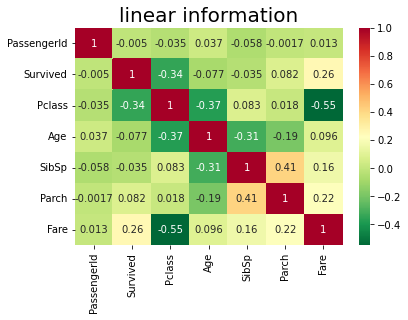

In [27]:
# correlation by features -> linear information

sns.heatmap(cor, annot=True,cmap='RdYlGn_r')
plt.title('linear information',fontsize =20)
plt.show()

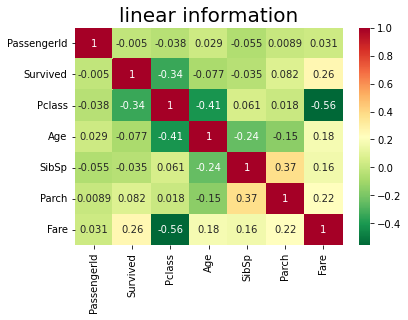

In [28]:
cor = total_data.corr()
sns.heatmap(cor, annot=True,cmap='RdYlGn_r')
plt.title('linear information',fontsize =20)
plt.show()

 traindata,testdata 의 NAN를 채운다 - >fare  -  class

또는 확인


In [31]:
total_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [37]:
total_data[total_data['Fare'].isnull()]
#60세 늙은 3등 급 칸 남성,, ?

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [47]:
data = total_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [50]:
f = data.loc[(data['Pclass'] == 1)]
s = data.loc[(data['Pclass'] == 2)]
t = data.loc[(data['Pclass'] == 3)]
print(f.Fare.mean())
print(s.Fare.mean())
print(t.Fare.mean())
# pclass 3 -> fare 쌈

87.5089916408668
21.1791963898917
13.302888700564969


In [53]:
f.max() # 돈많은 할머니,,

PassengerId                        1306
Survived                            1.0
Pclass                                1
Name           Young, Miss. Marie Grice
Sex                                male
Age                                80.0
SibSp                                 3
Parch                                 4
Ticket                        WE/P 5735
Fare                           512.3292
dtype: object

### Age , 

1. baby,,,,,,,, -> 나이대별 사망?

In [36]:
data = total_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [43]:
age=data[['Age','Survived']]

In [46]:
age.isnull().sum()

Age         263
Survived    418
dtype: int64

In [58]:
trdf = train_data[['Age','Survived']]
# 나이 평균으로 결측 채우기
meanAge = trdf.Age.mean()
meanAge = round(meanAge,3)
meanAge

29.699

In [59]:
trdf.Age=trdf.Age.fillna(meanAge)     
trdf.isnull().sum()

Age         0
Survived    0
dtype: int64

In [60]:
o = trdf.loc[(trdf['Age'] > 13)]
y = trdf.loc[(trdf['Age'] <= 13)]

def survived(seriess):
    s =0
    d =0
    for x in seriess :
        if x == 1:
            s+=1
        else: d+=1

    result= s/(s+d)
    return result


print(round(survived(o.Survived),3),round(survived(y.Survived),3))

print("생존율 차이:",round(survived(y.Survived),3)/round(survived(o.Survived),3))

# 13 이하 이면 확률이 현저히 높다 -> 그럼 몇살까지? ,성별 영향 ? , null 값이 평균이 아니 라면


0.366 0.592
생존율 차이: 1.6174863387978142


## 이름 분석


In [81]:
# Name ,FirstName ,  Mr,Mis etc
nameda =data[['Name','Survived']]
nameda['NameTag'] = 'Mr'
nameda['FirstName'] = 'Cho'

In [84]:
nameda.head()

,Name,Survived,NameTag,FirstName
0,"Braund, Mr. Owen Harris",0.0,Mr,Cho
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,Mr,Cho
2,"Heikkinen, Miss. Laina",1.0,Mr,Cho
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,Mr,Cho
4,"Allen, Mr. William Henry",0.0,Mr,Cho


In [94]:
a="Braund, Mr. Owen Harris"
a=a.replace(',','.')
a

'Braund. Mr. Owen Harris'

In [137]:
def NameCut(seriess,df):
    cnt = 0 
    for nameg in seriess :
        nameg = nameg.replace(',','.')
        nameg = nameg.replace(' ','')
        namesplit = nameg.split('.')
        df['FirstName'][cnt]=namesplit[0]        
        df['NameTag'][cnt]=namesplit[1]
        cnt+=1

NameCut(nameda.Name,nameda)

In [138]:
nameda

,Name,Survived,NameTag,FirstName
0,"Braund, Mr. Owen Harris",0.0,Mr,Braund
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,Mrs,Cumings
2,"Heikkinen, Miss. Laina",1.0,Miss,Heikkinen
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,Mrs,Futrelle
4,"Allen, Mr. William Henry",0.0,Mr,Allen
...,...,...,...,...
413,"Spector, Mr. Woolf",NaN,Mr,Cunningham
414,"Oliva y Ocana, Dona. Fermina",NaN,Mr,Sundman
415,"Saether, Mr. Simon Sivertsen",NaN,Mrs,Meek
416,"Ware, Mr. Frederick",NaN,Mrs,Drew


In [103]:
train_data['NameTag'] = 'Mr'
test_data['NameTag'] = 'Mr'
train_data['FirstName'] = 'Cho'
test_data['FirstName'] = 'Cho'
NameCut(train_data.Name,train_data)
NameCut(test_data.Name,test_data)
data['NameTag'] = 'Mr'
data['FirstName'] = 'Cho'
NameCut(data.Name,data)

In [104]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTag,FirstName
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,Allen


In [106]:
teagename=data[['NameTag','FirstName','Survived','Sex','Cabin','Age']]

In [107]:
#pd.crosstab(tragename.NameTag, agename.Sex).T.style.background_gradient(cmap='summer_r')
pd.crosstab(teagename.NameTag,teagename.Sex).T.style.background_gradient(cmap='summer_r')

NameTag,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,9,219,2,1,83,146,1,2,0,1
male,1,2,2,9,1,0,2,54,64,0,1,662,37,0,7,1,0


In [108]:
pd.crosstab(teagename.FirstName, teagename.Sex).T.style.background_gradient(cmap='summer_r')

FirstName,Abbing,Abbott,Abelson,Adahl,Adams,Ahlin,Aks,Albimona,Alexander,Alhomaki,Ali,Allen,Allison,Allum,Andersen-Jensen,Anderson,Andersson,Andreasson,Andrew,Andrews,Angle,Appleton,Arnold-Franchi,Artagaveytia,Asim,Asplund,Astor,Attalah,Aubart,Augustsson,Ayoub,Backstrom,Baclini,Badt,Bailey,Balkic,Ball,Banfield,Barah,Barbara,Barber,Barkworth,Barton,Bateman,Baumann,Baxter,Bazzani,Beane,Beavan,Becker,Beckwith,Beesley,Behr,Bengtsson,Berglund,Berriman,Betros,Bidois,Bing,Birkeland,Bishop,Bissette,Bjornstrom-Steffansson,Blackwell,Blank,Bonnell,Bostandyeff,Boulos,Bourke,Bowen,Bowerman,Bracken,Bradley,Braund,Brewe,Brocklebank,Brown,Bryhl,Burke,Burns,Buss,Butler,Butt,Byles,Bystrom,Cacic,Cairns,Calderhead,Caldwell,Calic,Cameron,Campbell,Canavan,Cann,Caram,Carbines,Cardeza,Carlsson,Carr,Carrau,Carter,Cavendish,Celotti,Chaffee,Chambers,Chapman,Charters,Cherry,Chibnall,Chip,Christmann,Christy,Chronopoulos,Clarke,Cleaver,Clifford,Coelho,Cohen,Coleff,Coleridge,Collander,Colley,Collyer,Compton,Connaghton,Connolly,Connors,Cook,Cor,Corn,Coutts,Coxon,Crease,Cribb,Crosby,Culumovic,Cumings,Cunningham,Dahl,Dahlberg,Dakic,Daly,Danbom,Daniel,Danoff,Dantcheff,Davidson,Davies,Davis,Davison,Dean,Denkoff,Dennis,Devaney,Dick,Dimic,Dodge,Doharr,Doling,Dooley,Dorking,Douglas,Dowdell,Downton,Drazenoic,Drew,Duane,Duff Gordon,Duran y More,Edvardsson,Eitemiller,Eklund,Ekstrom,Elias,Elsbury,Emanuel,Emir,Endres,Eustis,Fahlstrom,Farrell,Farthing,Faunthorpe,Fischer,Fleming,Flynn,Foo,Ford,Foreman,Fortune,Fox,Francatelli,Frauenthal,Frolicher,Frolicher-Stehli,Frost,Fry,Funk,Futrelle,Fynney,Gale,Gallagher,Garfirth,Garside,Gaskell,Gavey,Gee,Gheorgheff,Giglio,Giles,Gilinski,Gill,Gillespie,Gilnagh,Givard,Glynn,Goldenberg,Goldschmidt,Goldsmith,Goncalves,Goodwin,Graham,Green,Greenberg,Greenfield,Gronnestad,Guggenheim,Gustafsson,Haas,Hagland,Hakkarainen,Hale,Hamalainen,Hampe,Hanna,Hansen,Harder,Harknett,Harmer,Harper,Harrington,Harris,Harrison,Hart,Hassab,Hassan,Hawksford,Hays,Healy,Hedman,Hegarty,Heikkinen,Heininen,Hendekovic,Henry,Herman,Hewlett,Hickman,Hippach,Hirvonen,Hocking,Hodges,Hogeboom,Hold,Holm,Holverson,Homer,Honkanen,Hood,Horgan,Hosono,Hoyt,Humblen,Hunt,Ibrahim Shawah,Icard,Ilett,Ilmakangas,Isham,Ivanoff,Jacobsohn,Jalsevac,Jansson,Jardin,Jarvis,Jenkin,Jensen,Jermyn,Jerwan,Johannesen-Bratthammer,Johanson,Johansson,Johnson,Johnston,Jonkoff,Jonsson,Jussila,Kallio,Kalvik,Kantor,Karaic,Karlsson,Karun,Kassem,Keane,Keefe,Kelly,Kent,Kenyon,Kiernan,Kilgannon,Kimball,Kink,Kink-Heilmann,Kirkland,Klaber,Klasen,Knight,Kraeff,Kvillner,Lahoud,Lahtinen,Laitinen,Laleff,Lam,Landergren,Lang,Laroche,Larsson,LeRoy,Leader,Leeni,Lefebre,Lehmann,Leinonen,Leitch,Lemberopolous,Lemore,Lennon,Leonard,Lester,Lesurer,Levy,Lewy,Leyson,Lievens,Lindahl,Lindblom,Lindell,Lindqvist,Lines,Ling,Lobb,Long,Longley,Louch,Lovell,Lulic,Lundahl,Lurette,Mack,Madigan,Madill,Madsen,Maenpaa,Maioni,Maisner,Mallet,Mamee,Mangan,Mannion,Marechal,Markoff,Markun,Marvin,Masselmani,Matthews,Mayne,McCarthy,McCormack,McCoy,McDermott,McEvoy,McGough,McGovern,McGowan,McKane,McMahon,McNamee,Meanwell,Meek,Mellinger,Mellors,Meo,Mernagh,Meyer,Millet,Milling,Minahan,Mineff,Mionoff,Mitchell,Mitkoff,Mockler,Moen,Molson,Montvila,Moor,Moore,Moran,Moraweck,Morley,Morrow,Moss,Moubarek,Moussa,Moutal,Mudd,Mullens,Murdlin,Murphy,Myhrman,Naidenoff,Najib,Nakid,Nankoff,Nasser,Natsch,Navratil,Nenkoff,Newell,Newsom,Nicholls,Nicholson,Nicola-Yarred,Nilsson,Nirva,Niskanen,Norman,Nosworthy,Novel,Nye,Nysten,Nysveen,O'Brien,O'Connell,O'Connor,O'Driscoll,O'Dwyer,O'Leary,O'Sullivan,Odahl,Ohman,Olsen,Olsson,Olsvigen,Oreskovic,Osen,Osman,Ostby,Otter,Padro y Manent,Pain,Palsson,Panula,Parkes,Parr,Parrish,Partner,Pasic,Patchett,Paulner,Pavlovic,Pears,Peduzzi,Pekoniemi,Penasco y Castellana,Pengelly,Perkin,Pernot,Perreault,Persson,Peter,Peters,Petranec,Petroff,Petterson,Pettersson,Peuchen,Phillips,Pickard,Pinsky,Plotcharsky,Ponesell,Porter,Potter,Quick,Radeff,Razi,Reed,Reeves,Rekic,Renouf,Reuchlin,Reynaldo,Rice,Richard,Richards,Ridsdale,Ringhini,Rintamak

In [115]:
def survratio(col):
    return data.groupby(col)['Survived'].mean()
survratio('NameTag')

NameTag
 Capt            0.000000
 Col             0.500000
 Don             0.000000
 Dr              0.428571
 Jonkheer        0.000000
 Lady            1.000000
 Major           0.500000
 Master          0.575000
 Miss            0.697802
 Mlle            1.000000
 Mme             1.000000
 Mr              0.156673
 Mrs             0.792000
 Ms              1.000000
 Rev             0.000000
 Sir             1.000000
 the Countess    1.000000
Name: Survived, dtype: float64

In [152]:
def ageratio(col):
    return data.groupby(col)['Age'].mean()
ageratio('NameTag')

NameTag
 Capt            70.000000
 Col             58.000000
 Don             45.000000
 Dr              37.111111
 Jonkheer        38.000000
 Lady            48.000000
 Major           48.500000
 Master          14.117018
 Miss            25.455752
 Mlle            24.000000
 Mme             26.500000
 Mr              31.563774
 Mrs             33.760194
 Ms              28.000000
 Rev             39.000000
 Sir             49.000000
 the Countess    33.000000
Name: Age, dtype: float64

Master가 어리다 ? / 생존율이 반?


1 . 특이한 name tag 이용 나이를 채우자... Rev, Dr, etc..

어린이 한테 mr 를 쓸까,,?

2 . 남은칸 lastname 이용 ,sex   -> 아이 찾기

In [149]:
dataname=data[['NameTag','Age']]

In [159]:
df =dataname.loc[dataname['NameTag']==' Master']
len(df)

63

In [186]:
df.isnull().sum()  # 6개,,

NameTag    0
Age        6
dtype: int64

In [197]:
df1 = list(df.Age)
cnt=0
for x in df1:
    if x <= 15:
        cnt+=1

In [198]:
cnt

36

In [201]:
print(round(36/57,3))

0.632



master 의 mean age : 14

15 세이하 비율,, 60%

master total 생존율          57.5%

..?


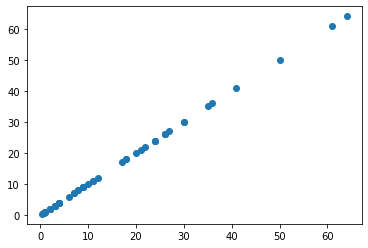

In [177]:
plt.scatter(df1,df1)
plt.show()

In [204]:
dnc=data[['NameTag','Age','Pclass']]

In [216]:
f = dnc.loc[(dnc['Pclass'] == 1)]
s = dnc.loc[(dnc['Pclass'] == 2)]
t = dnc.loc[(dnc['Pclass'] == 3)]

In [217]:
f_m = f.loc[(f['NameTag']==' Master')]
s_m = s.loc[(s['NameTag']==' Master')]
t_m = t.loc[(t['NameTag']==' Master')]

In [226]:
print(f_m.Age.mean(),s_m.Age.mean(),t_m.Age.mean())

25.990000000000002 16.962777777777777 9.400645161290322


* Age 결측치
1. 가족 별 아이 찾기 -> sbsp , firstname,parch,cabin
2. name Tag, class  별 평균으로 체우기


3. 성별,pclass,age 종합 적으로 분석

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  NameTag      1309 non-null   object 
 13  FirstName    1309 non-null   object 
dtypes: float64(3), int64(4), object(7)
memory usage: 185.7+ KB


In [258]:
def NameTagAge(dnc,tagname):

    f = dnc.loc[(dnc['Pclass'] == 1)&(dnc['NameTag'] == tagname)]
    s = dnc.loc[(dnc['Pclass'] == 2)&(dnc['NameTag'] == tagname)]
    t = dnc.loc[(dnc['Pclass'] == 3)&(dnc['NameTag'] == tagname)]    
    
    f.Age=f.Age.fillna(f.Age.mean())
    s.Age=s.Age.fillna(s.Age.mean())
    t.Age=t.Age.fillna(t.Age.mean())
    
    newdf = pd.concat([f,s])
    newdf = pd.concat([newdf,t])
    
    return newdf
    
mastergroup = NameTagAge(data,' Master')
print(mastergroup.Age.isnull().sum())
mastergroup

0


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,NameTag,FirstName
305,306,1.0,1,"Allison, Master. Hudson Trevor",male,0.920000,1,2,113781,151.5500,C22 C26,S,Master,Allison
445,446,1.0,1,"Dodge, Master. Washington",male,4.000000,0,2,33638,81.8583,A34,S,Master,Dodge
802,803,1.0,1,"Carter, Master. William Thornton II",male,11.000000,1,2,113760,120.0000,B96 B98,S,Master,Carter
50,942,NaN,1,"Smith, Mr. Lucien Philip",male,24.000000,1,0,13695,60.0000,C31,S,Master,Panula
59,951,NaN,1,"Chaudanson, Miss. Victorine",female,36.000000,0,0,PC 17608,262.3750,B61,C,Master,Goodwin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,1057,NaN,3,"Kink-Heilmann, Mrs. Anton (Luise Heilmann)",female,26.000000,1,1,315153,22.0250,NaN,S,Master,Goldsmith
171,1063,NaN,3,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,Master,Rice
183,1075,NaN,3,"Lane, Mr. Patrick",male,9.400645,0,0,7935,7.7500,NaN,Q,Master,Becker
261,1153,NaN,3,"Nilsson, Mr. August Ferdinand",male,21.000000,0,0,350410,7.8542,NaN,S,Master,Asplund


In [260]:
# 나머지 

captgroup = NameTagAge(data,' Capt')
colgroup = NameTagAge(data,' Col')
dongroup = NameTagAge(data,' Don')
drgroup = NameTagAge(data,' Dr')
majorgroup = NameTagAge(data,' Major')
mastergroup= NameTagAge(data,' Master')

